# Using sqlalchemy for the bonus questions in sql-challenge
      by Diane Scherpereel     October 2019

In [1]:
# Check that sqlalchemy is installed and which version is on this computer
import sqlalchemy
sqlalchemy.__version__

'1.3.1'

In [2]:
# Import Matplot lib
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib import style
style.use('seaborn')

# OtherDependencies
import numpy as np
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [3]:
# Check that psychopg2 is installed and which version is on this computer
psycopg2.__version__

'2.8.3 (dt dec pq3 ext lo64)'

In [ ]:
from config import user_password

In [4]:
# Create an engine for the 'EmployeeSQL' database
engine = create_engine('postgresql://' + user_password + '@localhost:5432/EmployeeSQL')

In [5]:
# Create a connection
connection = engine.connect()

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['employees',
 'dept_manager',
 'salaries',
 'titles',
 'departments',
 'dept_emp',
 'customer']

In [14]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('salaries')
for column in columns:
    print(column['name'], column["type"])

emp_no BIGINT
salary BIGINT
from_date DATE
to_date DATE


In [15]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('titles')
for column in columns:
    print(column['name'], column["type"])

emp_no BIGINT
title VARCHAR(30)
from_date DATE
to_date DATE


# Create a bar graph to show the average salary by title

In [9]:
# Use `engine.execute` to select and display the average salaries by title
result_salary_title = engine.execute('SELECT titles.title, ROUND(AVG(salaries.salary),0) FROM salaries \
JOIN titles ON (salaries.emp_no=titles.emp_no) GROUP BY titles.title \
ORDER BY AVG(salaries.salary) DESC').fetchall()
result_salary_title

[('Senior Staff', Decimal('58503')),
 ('Staff', Decimal('58465')),
 ('Manager', Decimal('51531')),
 ('Technique Leader', Decimal('48581')),
 ('Engineer', Decimal('48540')),
 ('Senior Engineer', Decimal('48507')),
 ('Assistant Engineer', Decimal('48493'))]

In [10]:
title = [result[0] for result in result_salary_title]
average_salary = [int(result[1]) for result in result_salary_title]
print(title)
print(average_salary)

['Senior Staff', 'Staff', 'Manager', 'Technique Leader', 'Engineer', 'Senior Engineer', 'Assistant Engineer']
[58503, 58465, 51531, 48581, 48540, 48507, 48493]


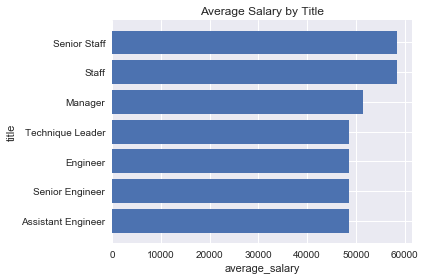

In [11]:
# Create a horizontal bar chart and plot the title on the y-axis and the average salary on the x-axis
fig, ax = pyplot.subplots()
ypos = range(1, len(average_salary)+1)
ax.barh(ypos, average_salary[::-1])
ax.set_xlabel("average_salary")
ax.set_ylabel("title")
ax.set_yticks(ypos)
ax.set_yticklabels(title[::-1])
ax.set_title("Average Salary by Title")
fig.tight_layout()
pyplot.show()


# This bar graph raises suspicions that this is a fake data set.
We would not expect assistant engineers, engineers, and senior engineers to all make the same average salary. It implies there is no pay increase with a promotion. The same is true of staff and senior staff, and it would be strange for staff to make more money than the manager and more money than the engineers. A "technique leader" is a position I have never heard of in a company.

# Create a histogram to show the most common salaries

In [12]:
# Query the salaries to then create a histogram
salaries = pd.read_sql("SELECT salaries.salary FROM salaries", connection)
salaries.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3a0f98>]],
      dtype=object)

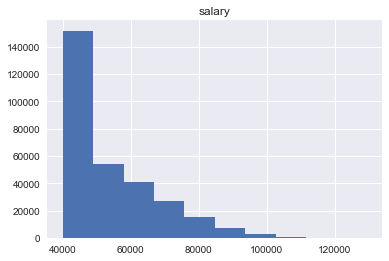

In [13]:
# Plot the results as a histogram
salaries.hist()

# Wow, a lot of people have salaries in the 40,000 dollar range!

# I also saw that the employee id the manager mentioned is for April Foolsday!